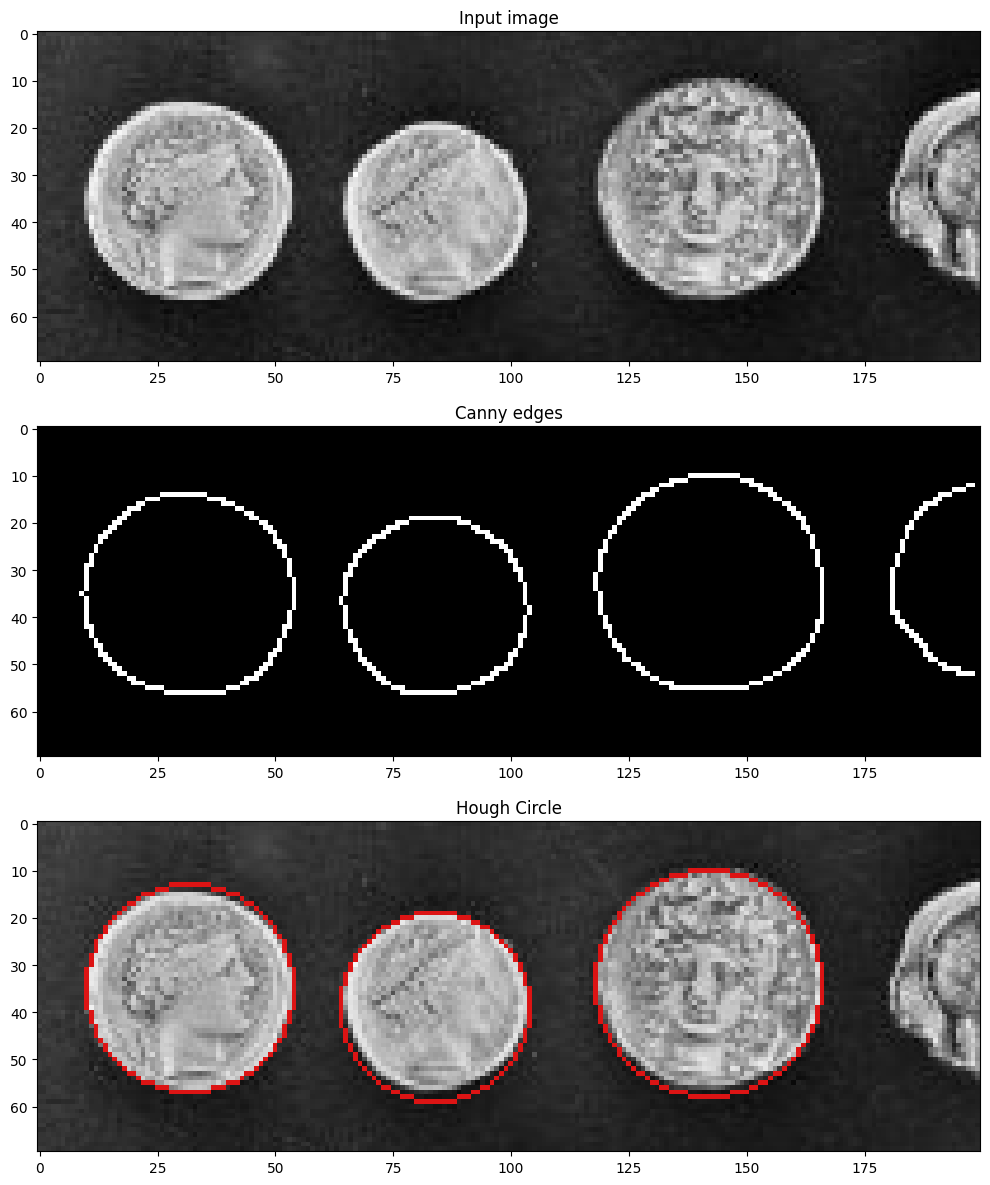

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Generating figure 2
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)
ax[2].imshow(image, cmap=plt.cm.gray)
ax[2].set_title('Hough Circle')

# for a in ax:
#     a.set_axis_off()

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


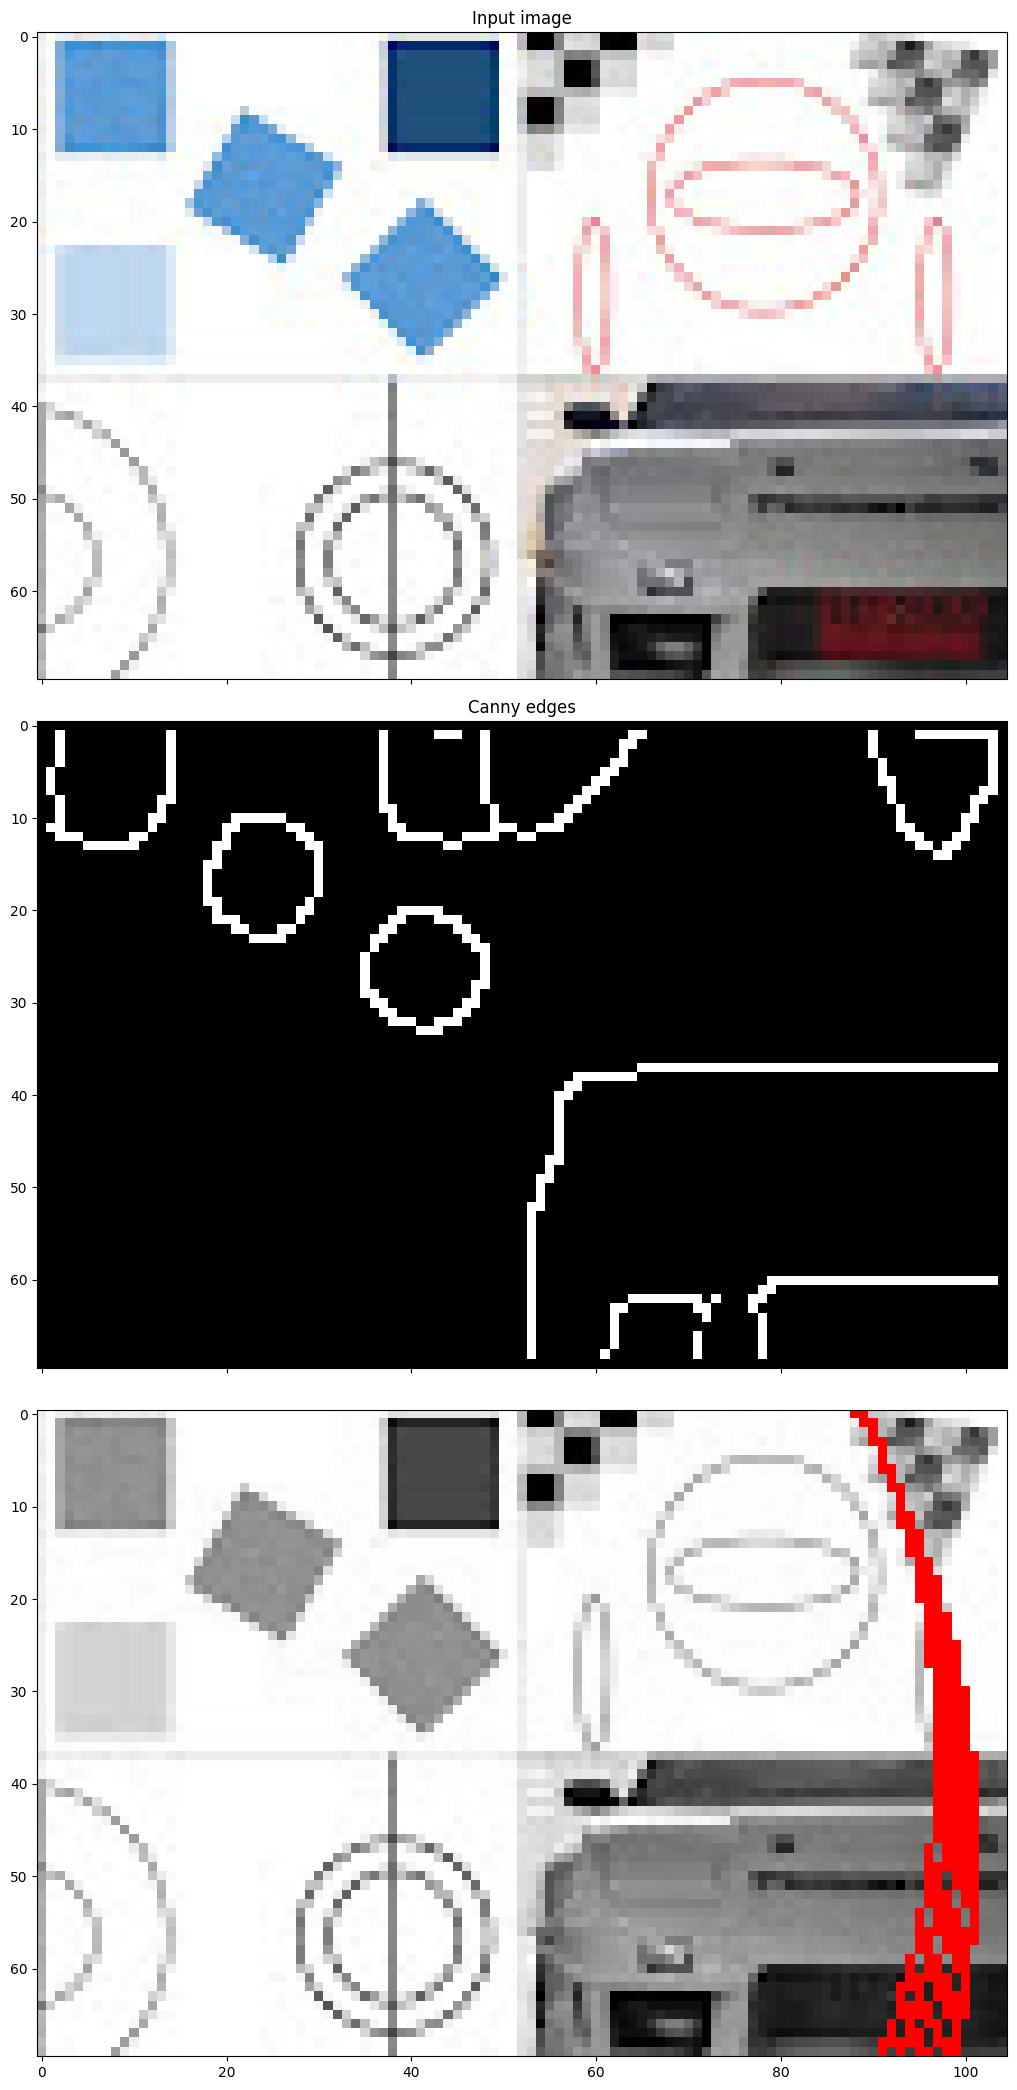

In [2]:
from skimage import io
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

from matplotlib import cm

filename = 'Example_Lab.jpg'
image_rgb = io.imread(filename)
image_gray = rgb2gray(image_rgb)

edges = canny(image_gray, sigma=3)

# Detect two radii
hough_radii = np.arange(90, 120, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii
                                          , total_num_peaks=10)

# Generating figure 2
fig, axes = plt.subplots(3, 1, figsize=(18, 21), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_rgb, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

# ax[2].imshow(edges * 0)
image = color.gray2rgb(image_gray)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (255, 0, 0)
ax[2].imshow(image, cmap=plt.cm.gray)

plt.tight_layout()
plt.show()

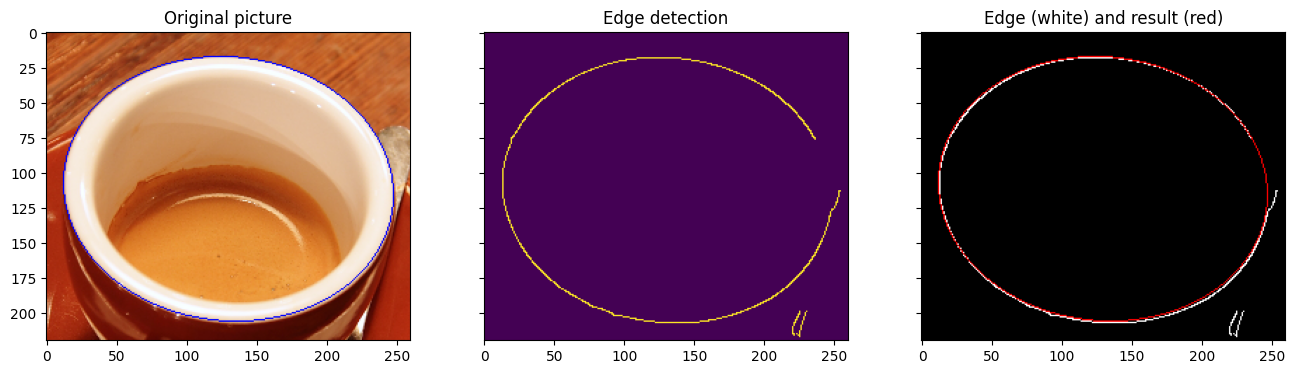

In [3]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges2 = color.gray2rgb(img_as_ubyte(edges))
edges2[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(16, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge detection')
ax2.imshow(edges)

ax3.set_title('Edge (white) and result (red)')
ax3.imshow(edges2)

plt.show()